```
This exploratory data analysis (EDA) examines a dataset of ultra marathon running, sourced from Kaggle, with the goal of identifying factors that influence athletic performance. The dataset spans from 1978 to 2022,with a total of 7,461,226 race records from 1,641,168 unique athletes. For this analysis, I focused on data from 2018. I chose to compare the 50km and 100km distances, as they represented the largest portion of the available data. By analyzing these race distances, the goal is to uncover insights into performance trends, including factors such as age, gender, and seasonal variations, that influence ultra marathon results.
```

In [ ]:
# import  libraries 
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np

data = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")
df = pd.DataFrame(data)

In [417]:
# See the data that's been imported 
df.head(25)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [418]:
# Rows, columns
df.shape

(7461195, 13)

In [419]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [420]:
df2 = df[
    (df['Event distance/length'].isin(['50km', '100km'])) & 
    (df['Year of event'] == 2018) & 
    ((df['Athlete gender'] == 'M') | (df['Athlete gender'] == 'F'))
]

df2.head(25)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [421]:
df2.shape

(211723, 13)

In [422]:
# Remove country from event name
df2['Event name'] = df2['Event name'].str.replace(r'\s\([A-Za-z]{3}\)', ' ', regex=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_20308\1235704196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event name'] = df2['Event name'].str.replace(r'\s\([A-Za-z]{3}\)', ' ', regex=True)


In [423]:
# Clean up athlete age
df2['Athlete age'] = 2018 - df2['Athlete year of birth']

C:\Users\Owner\AppData\Local\Temp\ipykernel_20308\589088012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete age'] = 2018 - df2['Athlete year of birth']


In [424]:
# Remove h from athlete performance
df2['Athlete performance'] = df2['Athlete performance'].str.replace('h', '')

C:\Users\Owner\AppData\Local\Temp\ipykernel_20308\1826682906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete performance'] = df2['Athlete performance'].str.replace('h', '')


In [425]:
# Drop columns: Athlete club, Athlete counrty, Athlete year of birth, Athlete age category
df2 = df2.drop(['Athlete club', 'Athlete year of birth', 'Athlete age category', 'Year of event'], axis = 1)

In [426]:
# Clean up null values 
df2.isna().sum()

Event dates                      0
Event name                       0
Event distance/length            0
Event number of finishers        0
Athlete performance              0
Athlete country                  0
Athlete gender                   0
Athlete average speed            0
Athlete ID                       0
Athlete age                  18921
dtype: int64

In [ ]:
df2[df2['Athlete age'].isna() == True]

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete average speed,Athlete ID,Athlete age
11,06.01.2018,Selva Costera,50km,22,7:09:58,CHI,M,6.977,11,NaN
19,06.01.2018,Selva Costera,50km,22,8:13:16,CHI,M,6.082,19,NaN
20,06.01.2018,Selva Costera,50km,22,8:13:28,CHI,M,6.079,20,NaN
246,02.01.2018,Sandman 50,50km,15,4:59:11,AUS,M,10.027,246,NaN
247,02.01.2018,Sandman 50,50km,15,5:03:10,AUS,M,9.896,247,NaN
...,...,...,...,...,...,...,...,...,...,...
660757,27.10.2018,Annapurna 50k Ultra Trail,50km,78,11:46:29,NEP,F,4.246,374656,NaN
660774,27.10.2018,Annapurna 50k Ultra Trail,50km,78,13:37:57,NEP,M,3.668,374663,NaN
660848,27.-28.10.2018,Ultra Trail de México 100km,100km,220,15:54:55,CRC,M,6.283,189457,NaN
661233,27.10.2018,Ultra Trail de México 50km,50km,387,9:18:36,MEX,M,5.371,374882,NaN


In [ ]:
df2 = df2.dropna()
df2.shape

(192802, 10)

In [ ]:
# Check for duplicates
df2[df2.duplicated() == True]

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete average speed,Athlete ID,Athlete age


In [430]:
# Fix types
df2.dtypes 

Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete country               object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
Athlete age                  float64
dtype: object

In [ ]:
# Converts age, speed, and dates
df2['Athlete age'] = df2['Athlete age'].astype(int)
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)
df2['Event dates'] = pd.to_datetime(df2['Event dates'], format='%d.%m.%Y', dayfirst=True, errors='coerce')

# Remove rows with NaT (invalid dates)
df2 = df2[df2['Event dates'].notna()]

df2.dtypes

Event dates                  datetime64[ns]
Event name                           object
Event distance/length                object
Event number of finishers             int64
Athlete performance                  object
Athlete country                      object
Athlete gender                       object
Athlete average speed               float64
Athlete ID                            int64
Athlete age                           int64
dtype: object

<Axes: xlabel='Event distance/length', ylabel='Count'>

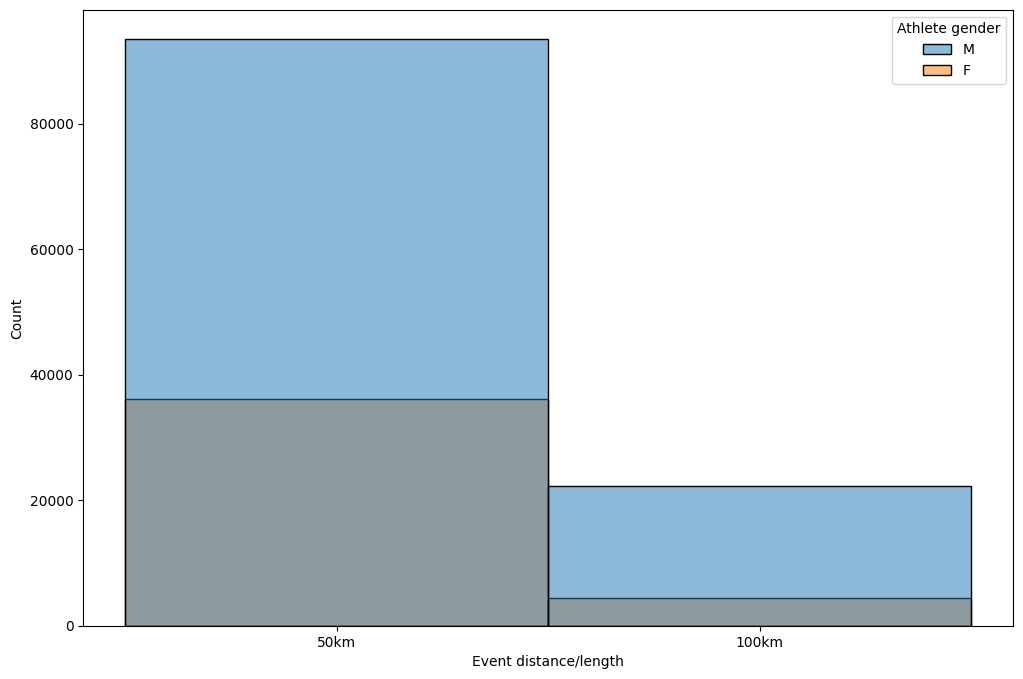

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df2, x='Event distance/length', hue = 'Athlete gender')

<Axes: xlabel='Event distance/length', ylabel='Athlete average speed'>

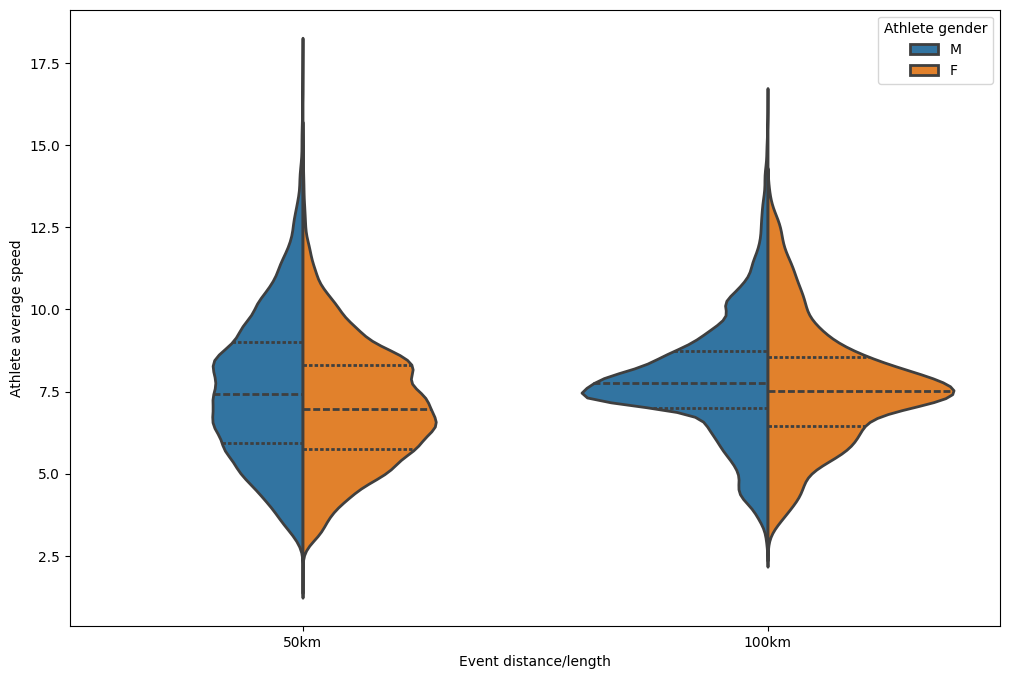

In [ ]:
plt.figure(figsize = (12, 8))
sns.violinplot(df2, x = 'Event distance/length', y = 'Athlete average speed', hue = 'Athlete gender', split = True, inner = 'quart', linewidth = 2)

In [ ]:
# Difference in speed for the 50k and 100km male to female
df2.groupby(['Event distance/length', 'Athlete gender'])['Athlete average speed'].mean()

Event distance/length  Athlete gender
100km                  F                 7.639011
                       M                 7.850344
50km                   F                 7.057603
                       M                 7.573505
Name: Athlete average speed, dtype: float64

```
The data shows that for the 100km race, males had an average speed of 7.85 km/h compared to females at 7.64 km/h, while in the 50km race, males averaged 7.57 km/h and females 7.06 km/h, indicating that males generally have a slight edge in both race distances, with the speed difference being more significant in the 50km race.
```

In [ ]:
# What age groups are the best in the 50km Race (show 5)
df2.query('`Event distance/length` == "50km"')\
    .groupby('Athlete age')['Athlete average speed']\
    .agg(['mean', 'count'])\
    .sort_values('mean', ascending=False)\
    .query('count > 19')\
    .head(10)


,mean,count
Athlete age,,
20,8.165649,299
22,7.660306,612
17,7.595311,61
53,7.555333,2366
24,7.545993,1105
21,7.539386,415
37,7.515936,4918
34,7.503897,4204
43,7.502257,4887


```
The data shows that 20-year-olds had the best average speed in the 50km race, with a speed of 8.17 km/h across 299 participants.

Looks like youth really does have an edge. Who knew 20-year-olds would be the ultra marathon speedsters!
```

In [ ]:
# What age groups are the worst in the 50km Race (show 5)
df2.query('`Event distance/length` == "50km"')\
    .groupby('Athlete age')['Athlete average speed']\
    .agg(['mean', 'count'])\
    .sort_values('mean', ascending=True)\
    .query('count > 19')\
    .head(10)


,mean,count
Athlete age,,
75,6.367793,58
79,6.396517,29
74,6.555818,66
76,6.579286,21
72,6.595756,86
73,6.638063,63
71,6.640958,118
77,6.880478,23
69,6.915353,204


```
The data shows that athletes aged 75 performed the worst in the 50km race, with an average speed of 6.37 km/h across 58 participants.

No excuse for not being in shape if 70-year-olds are crushing ultra marathons, we can all do a little better!
```

In [437]:
# Are summers slower than winter?
# 50 km only
# spring 3-5
# summer 6-8
# fall 9-11
# winter 12-2

df2['Race month'] = df2['Event dates'].dt.month
df2['Race season'] = df2['Race month'].apply(lambda x: 'Winter' if x > 11 
                                             else 'Fall' if x > 8 
                                             else 'Summer' if x > 5 
                                             else 'Spring' if x > 2 
                                             else 'Winter')
df2.query('`Event distance/length` == "50km"')\
    .groupby('Race season')['Athlete average speed']\
    .agg(['mean', 'count'])\
    .sort_values('mean', ascending = False)

,mean,count
Race season,,
Spring,7.796216,53063
Winter,7.606277,19419
Summer,7.124318,25523
Fall,6.951811,31532


```
For 50km races, Spring has the highest average speed at 7.80 km/h with 53,063 participants, while Fall has the lowest average speed at 6.95 km/h with 31,532 participants, indicating that athletes tend to perform faster in Spring compared to other seasons.
```

In [ ]:
# 100km only
df2.query('`Event distance/length` == "100km"')\
    .groupby('Race season')['Athlete average speed']\
    .agg(['mean', 'count'])\
    .sort_values('mean', ascending = False)

,mean,count
Race season,,
Summer,8.190482,7942
Fall,7.903816,7960
Spring,7.534096,7617
Winter,7.342285,3277


```
Summer has the highest average speed for 100km races at 8.19 km/h with 7,942 participants, while winter has the lowest average speed at 7.34 km/h with 3,277 participants, showing that athletes tend to race slower in Winter compared to Summer.
```

In [439]:
# What countries are the best in the 50km Race (show top 5)
df2.query('`Event distance/length` == "50km"')\
    .groupby('Athlete country')['Athlete average speed']\
    .agg(['mean', 'count'])\
    .sort_values('mean', ascending=False)\
    .query('count > 19')\
    .head(5)


,mean,count
Athlete country,,
KEN,12.445333,24
LES,12.150500,30
ZIM,10.348299,154
UKR,10.060366,172
SWZ,9.685763,38


```
The data shows athlete average speeds for 50km marathons, with Kenya leading at 12.445 km/h (24 participants) and Swaziland lowest at 9.686 km/h (38 participants)
```
